## Netflix Capstone

#### Objective
#### Create Model that finds the best suited Movie for one user in every genre.
#### Find what Movies have received the best and worst ratings based on User Rating.

In [1]:
#Importing All necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
movie_df = pd.read_csv(r"D:\INTELLIPAAT\Capstone Proj\Netflix\NETFLIX_YOGANSHU\Copy of combined_data_1.txt\combined_data_1.txt",header=None,names=["Cust_Id","Rating"],usecols=[0,1])

## Exploratory Data Analysis

In [3]:
movie_df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
#Checking for Null values
movie_df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [5]:
#Checking for duplicates
movie_df.duplicated().sum()
#Duplicates are allowed since this is a rating column and we can have multiple same ratings for same user

22234208

In [6]:
#Getting number of movies using Nan values in Rating column
print('Total Number of Movies : ',movie_df['Rating'].isnull().sum())

Total Number of Movies :  4499


In [7]:
#Getting number of Users using Nan values and Unique count in Cust id column
unique_cust = movie_df['Cust_Id'].nunique()
print('Total Users : ', unique_cust - 4499)

Total Users :  470758


#### Generating Movie ID Column based on Nan values

In [8]:
movie_id=None
movie_np=[]

#iterate over the dataset in Cust_Id

for cust_id in movie_df["Cust_Id"]:
    if ":" in cust_id:
        # update the current movie_id
        movie_id=int(cust_id.replace(":",""))
    movie_np.append(movie_id)
    
movie_df['Movie_Id'] = movie_np
movie_df

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [9]:
#Removing rows with NAN values

movie_df = movie_df[movie_df['Rating'].notna()]
movie_df.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [10]:
#Checking for correct datatype

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [11]:
#Converting Cust_id column to integer

movie_df['Cust_Id'] = movie_df['Cust_Id'].astype(int)

In [12]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


#### pre- filtering
#### now we will remove all the users that have rated less number of movies
#### also all those movies that has been rated less in number

In [13]:
movie_summary = movie_df.groupby('Movie_Id')['Rating'].agg(['count'])
movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [14]:
# now we will create a benchmark

movie_benchmark=round(movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [15]:
#Getting list of index for rows less than benchmark

drop_movie_list=movie_summary[movie_summary["count"]<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [16]:
#now we will remove all the users that has less rating counts

movie_cust_summary=movie_df.groupby('Cust_Id')['Rating'].agg(["count"])
movie_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [17]:
# now we will create a benchmark

cust_benchmark=round(movie_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [18]:
#Getting list of index for rows less than benchmark
drop_cust_list = movie_cust_summary[movie_cust_summary['count']<36].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=282042)

In [19]:
#Dropping all the rows with index in drop_cust_list and drop_movie_list

movie_df=movie_df[~movie_df['Movie_Id'].isin(drop_movie_list)]
movie_df=movie_df[~movie_df['Cust_Id'].isin(drop_cust_list)]
movie_df

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


### Data preparation is been done

### Since there is no genre provided in the dataset we will be ignoring the first question as mentioned by Intellipaat team

================================================================================================================================

## 2. Create Model that finds the best suited Movie for one user.

#### Model Building

In [21]:
movie_title=pd.read_csv(r"D:\INTELLIPAAT\Capstone Proj\Netflix\NETFLIX_YOGANSHU\Copy of movie_titles.csv", encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name'])
movie_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [22]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [23]:
reader=Reader()

In [24]:
# Taking only top 200000 rows for faster completion
data = Dataset.load_from_df(movie_df[['Cust_Id','Movie_Id','Rating']][:200000],reader)

In [25]:
model=SVD()

In [26]:
cross_validate(model,data,measures=["RMSE"],cv=3)

{'test_rmse': array([0.99465612, 0.99285285, 1.00003665]),
 'fit_time': (1.8647010326385498, 1.8385214805603027, 1.7822299003601074),
 'test_time': (0.6896965503692627, 0.641202449798584, 0.6568102836608887)}

In [27]:
# Recommendation for single user
user_1331154=movie_title.copy() # making a copy of data set for this indivisual user
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [28]:
#It was having all the movies including those with less than 908 reviews which had to be drop
user_1331154 = user_1331154[~user_1331154["Movie_Id"].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [29]:
#Creating a estimation score for each movie for the user 1331154 using SVD model predict function

user_1331154["Estimate_score"]=user_1331154["Movie_Id"].apply(lambda x:model.predict(1331154,x).est)
user_1331154

,Movie_Id,Year,Name,Estimate_score
2,3,1997.0,Character,3.966137
4,5,2004.0,The Rise and Fall of ECW,4.010337
5,6,1997.0,Sick,3.286390
7,8,2004.0,What the #$*! Do We Know!?,3.479830
15,16,1996.0,Screamers,3.529596
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.661534
17766,17767,2004.0,Fidel Castro: American Experience,3.661534
17767,17768,2000.0,Epoch,3.661534
17768,17769,2003.0,The Company,3.661534


In [30]:
#The top 5 movies that should be recomended to the user 1331154 is
user_1331154.sort_values("Estimate_score",ascending=False).head()

,Movie_Id,Year,Name,Estimate_score
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.398104
31,32,2004.0,ABC Primetime: Mel Gibson's The Passion of the...,4.234440
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.125763
27,28,2002.0,Lilo and Stitch,4.025738
4,5,2004.0,The Rise and Fall of ECW,4.010337


==============================================================================================================================

## 3. Find what Genre Movies have received the best and worst ratings based on User Rating.

In [31]:
#Merging the dataset to extract user rating and movie name
movie_merge = pd.merge(movie_df,movie_title,on='Movie_Id')


In [32]:
#Average rating for each movie
movie_avg_rating = movie_merge.groupby('Name')['Rating'].agg('mean')

#Sorting based on Avg Rating column
movie_avg_rating = movie_avg_rating.sort_values(ascending=False)
movie_avg_rating

Name
Lost: Season 1                           4.667269
The Simpsons: Season 6                   4.588016
Family Guy: Freakin' Sweet Collection    4.520370
Inu-Yasha                                4.495253
Six Feet Under: Season 4                 4.466834
                                           ...   
Gerry                                    2.192842
Spice World                              2.122587
Druids                                   2.012658
House of the Dead                        1.962401
Shanghai Surprise                        1.755993
Name: Rating, Length: 1787, dtype: float64

In [33]:
#To get the top 10 movies with highest average rating
top_10_movies = movie_avg_rating.head(10)
top_10_movies = pd.DataFrame(top_10_movies,columns=['Rating'])
print('Best 10 movies based on user ratings are \n',top_10_movies)

Best 10 movies based on user ratings are 
                                                  Rating
Name                                                   
Lost: Season 1                                 4.667269
The Simpsons: Season 6                         4.588016
Family Guy: Freakin' Sweet Collection          4.520370
Inu-Yasha                                      4.495253
Six Feet Under: Season 4                       4.466834
Stargate SG-1: Season 8                        4.463280
The West Wing: Season 3                        4.456323
Gilmore Girls: Season 3                        4.438146
The Best of Friends: Vol. 4                    4.436311
Lord of the Rings: The Fellowship of the Ring  4.433863


In [34]:
worst_10_movies = movie_avg_rating.tail(10)
worst_10_movies = pd.DataFrame(worst_10_movies,columns=['Rating'])
print('Worst 10 movies based on user ratings are \n',worst_10_movies.sort_values(by='Rating'))

Worst 10 movies based on user ratings are 
                                                Rating
Name                                                 
Shanghai Surprise                            1.755993
House of the Dead                            1.962401
Druids                                       2.012658
Spice World                                  2.122587
Gerry                                        2.192842
Last Days                                    2.224939
Ernest Goes to Jail                          2.229789
Freddy Got Fingered                          2.230461
Dr. T & the Women                            2.254707
Starship Troopers 2: Hero of the Federation  2.280229


### Visualizing top 10 and worst 10 movies using rating bar plot

[]

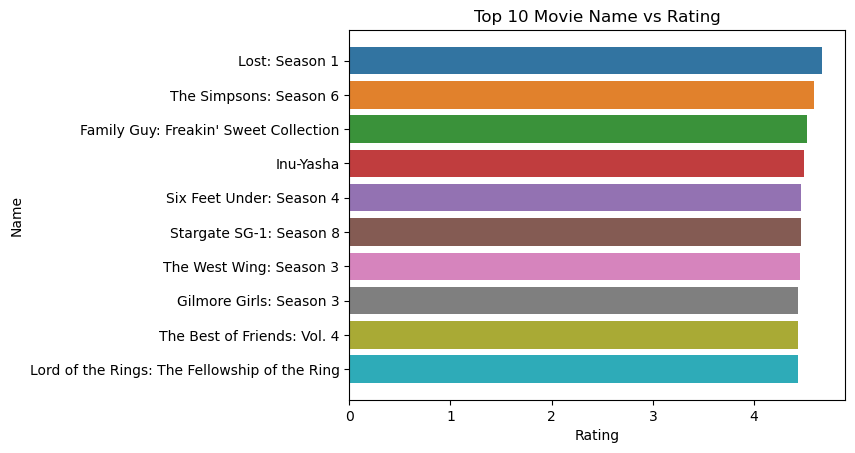

In [37]:
sns.barplot(x=top_10_movies['Rating'],y=top_10_movies.index)
plt.title('Top 10 Movie Name vs Rating')
plt.plot()

[]

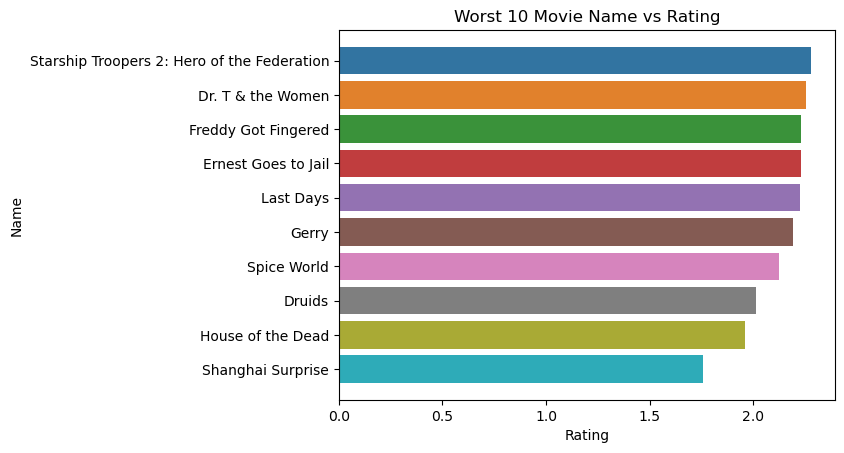

In [38]:
sns.barplot(x=worst_10_movies['Rating'],y=worst_10_movies.index)
plt.title('Worst 10 Movie Name vs Rating')
plt.plot()